# Mouse Viral Study

### Data

The data shown here simulates a medical study in which mice infected with a virus were given various doses of two medicines and then checked 2 weeks later to see if they were still infected. Given this data, our goal is to create a classifcation model than predict (given two dosage measurements) if they mouse will still be infected with the virus.

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

In [2]:
df = pd.read_csv("mouse_viral_study.csv")

In [3]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [4]:
df.shape

(400, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [6]:
df.describe()

,Med_1_mL,Med_2_mL,Virus Present
count,400.000000,400.000000,400.000000
mean,5.447984,5.616750,0.500000
std,2.319059,2.336637,0.500626
min,1.000000,1.000000,0.000000
25%,3.249062,3.431311,0.000000
50%,5.393776,5.638471,0.500000
75%,7.630389,7.782614,1.000000
max,10.000000,10.000000,1.000000


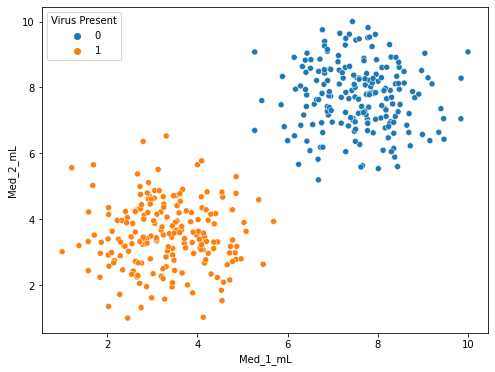

In [8]:
# Scatter Plot of Data:
plt.figure(figsize= (8,6))
sns.scatterplot(data= df, x= "Med_1_mL", y= "Med_2_mL", hue= "Virus Present")
plt.show()

In [9]:
# Data is clearly Seperable as both classes are seperated already.

### Train Test Split:

In [10]:
# Features:
x = df.drop("Virus Present", axis= 1)

In [11]:
x.shape

(400, 2)

In [12]:
# Target:
y = df["Virus Present"]

In [13]:
y.head()

0    0
1    1
2    0
3    1
4    1
Name: Virus Present, dtype: int64

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

In [17]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 2)
(80, 2)
(320,)
(80,)


### Scalling:

In [18]:
sc = StandardScaler()

In [19]:
temp = sc.fit_transform(x_train)
x_train = pd.DataFrame(temp, columns= x_train.columns)

In [20]:
x_train.head()

,Med_1_mL,Med_2_mL
0,-0.743112,-0.288760
1,0.919141,0.462684
2,-0.542522,-0.850714
3,-0.814237,-0.713486
4,-1.160812,-1.503026


In [21]:
temp = sc.transform(x_test)
x_test = pd.DataFrame(temp, columns= x_test.columns)

In [22]:
x_test.head()

,Med_1_mL,Med_2_mL
0,0.883020,0.638563
1,-1.119383,-0.673060
2,1.300251,0.241292
3,1.541596,0.942860
4,-0.404853,-0.967283


### Models:

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

In [ ]:
# we will Try different Kernel Options and see their outputs.

In [25]:
# This function will help us visualize how model is making Hyperplane using different Kernels.

# This function is directly available in SVM official documentation.

# https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


def plot_svm(model,X,y):
    
    X = X.values
    y = y.values
    
    # Scatter Plot
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30,cmap='seismic')

    
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

In [26]:
# Linear Kernel:

model1 = SVC(kernel= "linear", C= 1)

In [27]:
model1.fit(x_train, y_train)

SVC(C=1, kernel='linear')

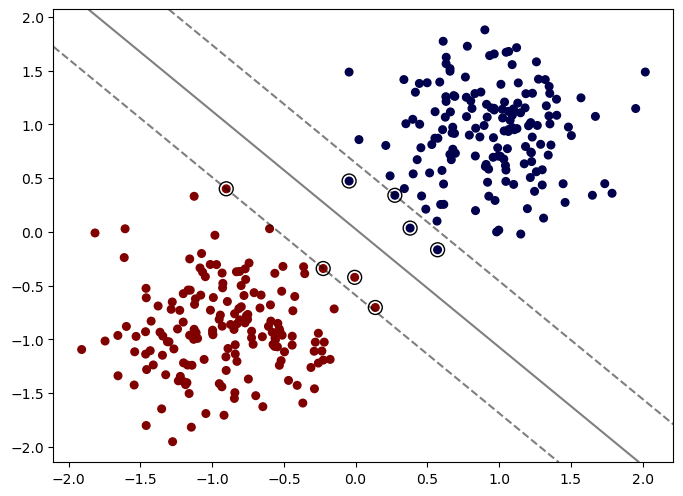

In [30]:
plt.figure(figsize= (8,6), dpi= 100)
plot_svm(model1, x_train, y_train)
plt.show()

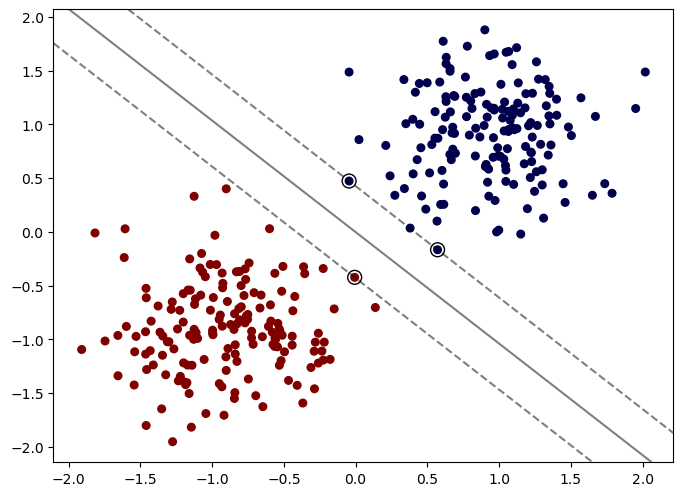

In [31]:
# Linear Kernel:

model2 = SVC(kernel= "linear", C= 100)

model2.fit(x_train, y_train)

plt.figure(figsize= (8,6), dpi= 100)
plot_svm(model2, x_train, y_train)
plt.show()

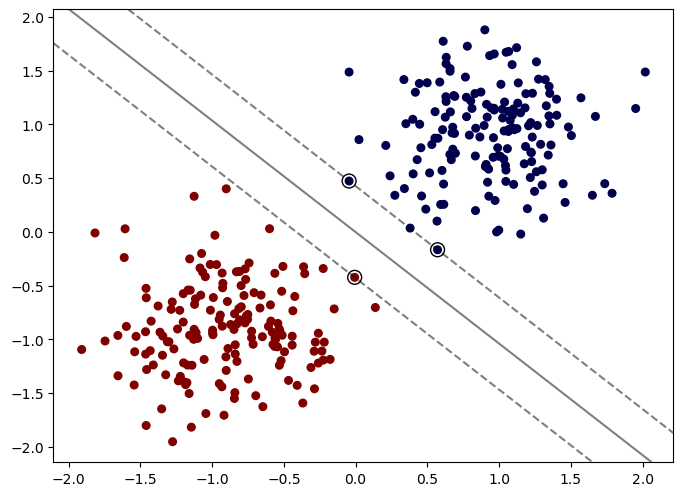

In [32]:
# Linear Kernel:

model3 = SVC(kernel= "linear", C= 1000)

model3.fit(x_train, y_train)

plt.figure(figsize= (8,6), dpi= 100)
plot_svm(model3, x_train, y_train)
plt.show()

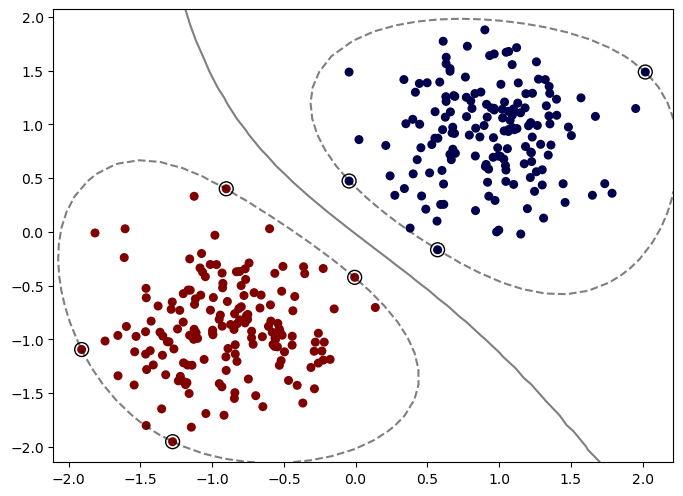

In [33]:
# RBF Kernel:

model4 = SVC(kernel= "rbf", C= 100)

model4.fit(x_train, y_train)

plt.figure(figsize= (8,6), dpi= 100)
plot_svm(model4, x_train, y_train)
plt.show()

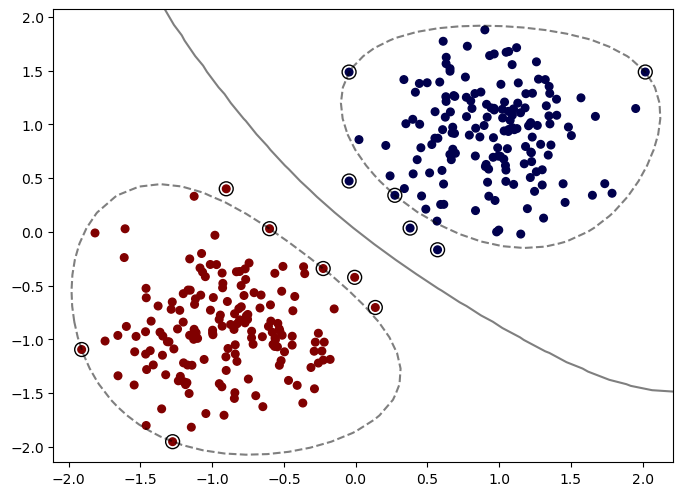

In [34]:
# RBF Kernel:

model5 = SVC(kernel= "rbf", C= 1)

model5.fit(x_train, y_train)

plt.figure(figsize= (8,6), dpi= 100)
plot_svm(model5, x_train, y_train)
plt.show()

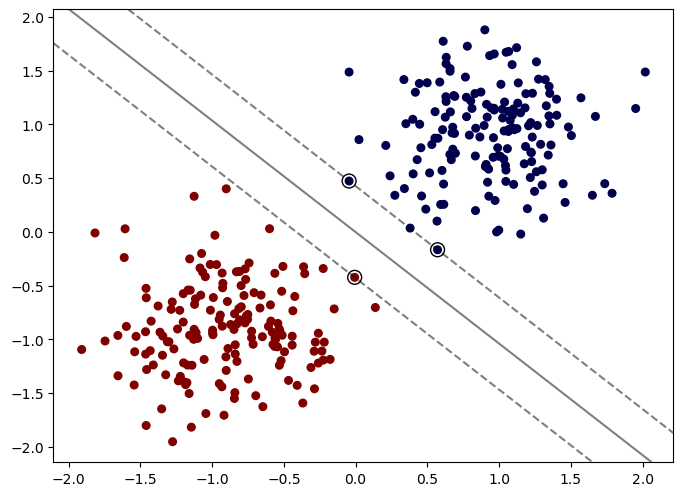

In [36]:
# Polynomial Kernel:

model6 = SVC(kernel= "poly", C= 100, degree= 1)

model6.fit(x_train, y_train)

plt.figure(figsize= (8,6), dpi= 100)
plot_svm(model6, x_train, y_train)
plt.show()

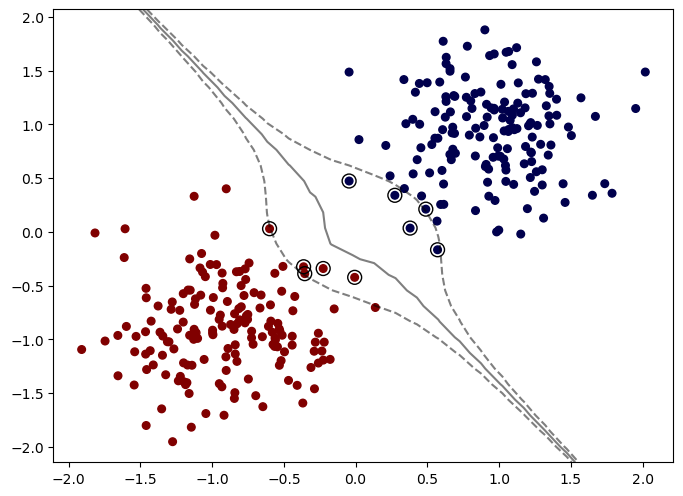

In [41]:
# Polynomial Kernel:

model7 = SVC(kernel= "poly", C= 100, degree= 3)

model7.fit(x_train, y_train)

plt.figure(figsize= (8,6), dpi= 100)
plot_svm(model7, x_train, y_train)
plt.show()

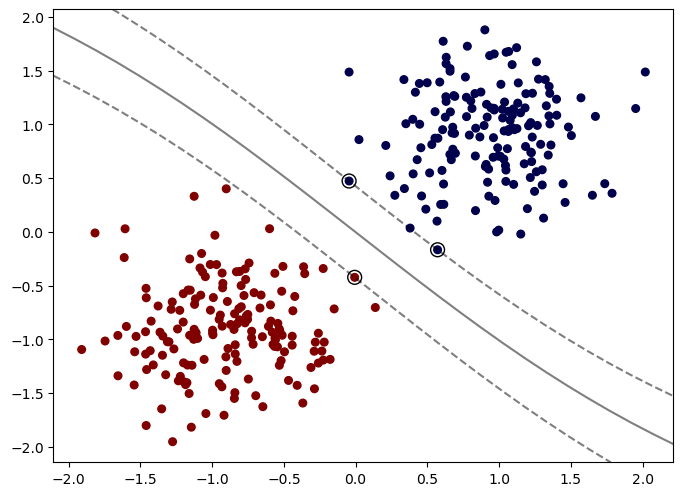

In [42]:
# Sigmoid Kernel:

model8 = SVC(kernel= "sigmoid", C= 100)

model8.fit(x_train, y_train)

plt.figure(figsize= (8,6), dpi= 100)
plot_svm(model8, x_train, y_train)
plt.show()

### Grid Search:

In [44]:
model = SVC()

In [45]:
param_dict = {"kernel" : ["linear", "rbf", "poly", "sigmoid"],
             "C" : [0.01, 0,1, 1, 10, 100],
             "degree" : [1,2,3], "gamma" : ["scale", "auto"]}

In [50]:
grid_model = GridSearchCV(estimator= model, param_grid= param_dict, cv= 5)

In [51]:
grid_model.fit(x_train, y_train)

C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 192, in sklearn.svm._libsvm.fit
ValueError: C <= 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Shailya\AppData\Roaming\

C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 192, in sklearn.svm._libsvm.fit
ValueError: C <= 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Shailya\AppData\Roaming\

C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 192, in sklearn.svm._libsvm.fit
ValueError: C <= 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Shailya\AppData\Roaming\

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0, 1, 1, 10, 100], 'degree': [1, 2, 3],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [52]:
grid_model.best_estimator_

SVC(C=0.01, degree=1, kernel='linear')

In [53]:
grid_model.best_params_

{'C': 0.01, 'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}

In [54]:
grid_model.best_score_

1.0

### Model Evaluation:

In [55]:
pred = grid_model.predict(x_test)

In [57]:
accuracy_score(y_test, pred)

1.0

In [58]:
precision_score(y_test, pred)

1.0

In [59]:
recall_score(y_test, pred)

1.0

In [60]:
confusion_matrix(y_test, pred)

array([[42,  0],
       [ 0, 38]], dtype=int64)

In [61]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        38

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



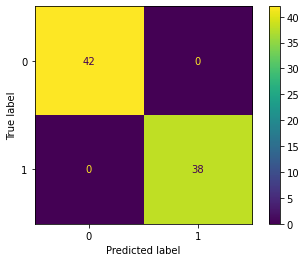

In [63]:
plot_confusion_matrix(grid_model, x_test, y_test)
plt.show()

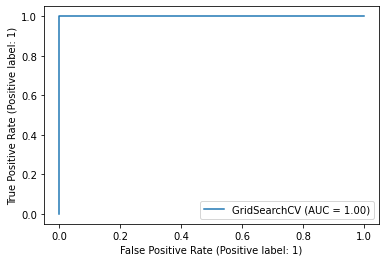

In [64]:
plot_roc_curve(grid_model, x_test, y_test)
plt.show()

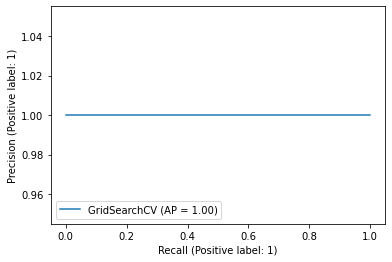

In [65]:
plot_precision_recall_curve(grid_model, x_test, y_test)
plt.show()